[View in Colaboratory](https://colab.research.google.com/github/starman3ch/kaggle-competitions-play-level/blob/master/Dogs_vs_Cats_Redux.ipynb)

In [42]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats"

test  test (1)	test.zip  train  train.zip


In [0]:
import zipfile
# with zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats/train.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats")

# with zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats/test.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats")

In [0]:
TRAIN_DIR = '/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats/train/'
TEST_DIR = '/content/drive/My Drive/Colab Notebooks/datasets/dogs vs cats/test/'
SAVED_MODELS_FILE = '/content/drive/My Drive/Colab Notebooks/saved_models/dogscats.weights.best.from_scratch.hdf5'
IMG_SIZE = 64

In [0]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images)
test_images =  test_images[:25]

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image # image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [49]:
train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25
Train shape: (2000, 64, 64, 3)
Test shape: (25, 64, 64, 3)


In [0]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

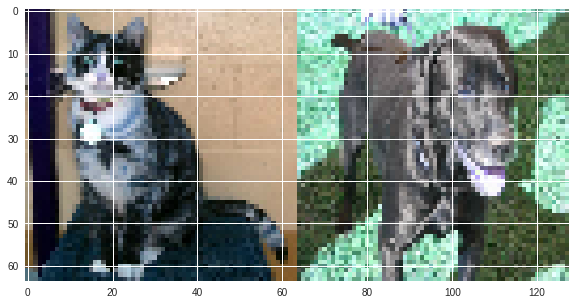

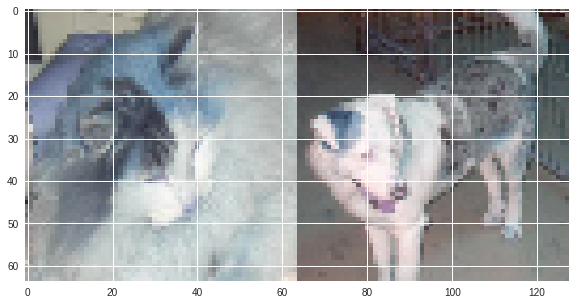

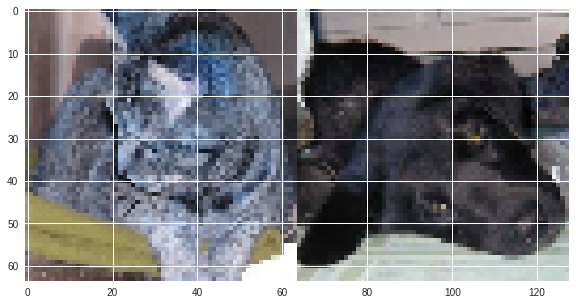

In [51]:
def show_cats_and_dogs(idx):
  cat = read_image(train_cats[idx])
  dog = read_image(train_dogs[idx])
  pair = np.concatenate((cat, dog), axis=1)
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
  
for idx in range(0,3):
  show_cats_and_dogs(idx)

In [52]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(ROWS, COLS, CHANNELS)))
model.add(MaxPooling2D(pool_size=2, dim_ordering='tf'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, dim_ordering='tf'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, dim_ordering='tf'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, dim_ordering='tf'))
model.add(GlobalAveragePooling2D())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 32)          0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=2, data_format="channels_last")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=2, data_format="channels_last")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=2, data_format="channels_last")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=2, data_format="channels_last")`


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
from keras.callbacks import ModelCheckpoint  

epochs = 100
batch_size = 20

checkpointer = ModelCheckpoint(filepath=SAVED_MODELS_FILE, 
                               verbose=1, save_best_only=True)

model.fit(train, labels, 
          validation_split=0.25, shuffle=True,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 1500 samples, validate on 500 samples
Epoch 1/100
1500/1500 [==============================] - 1s 905us/step - loss: 0.1888 - acc: 0.9867 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to /content/drive/My Drive/Colab Notebooks/saved_models/dogscats.weights.best.from_scratch.hdf5
Epoch 2/100
1500/1500 [==============================] - 1s 868us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/100
1500/1500 [==============================] - 1s 644us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/100
1500/1500 [==============================] - 1s 634us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/100
1500/1500 [==============================] - 1s

In [0]:
model.load_weights(SAVED_MODELS_FILE)

In [0]:
predictions = model.predict(test, verbose=0)

I am 100.00% sure this is a Dog


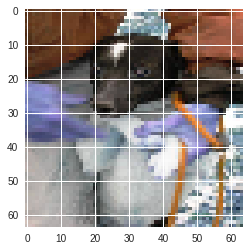

I am 100.00% sure this is a Dog


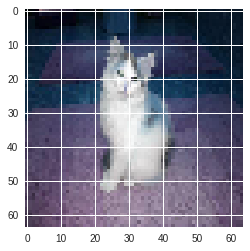

I am 100.00% sure this is a Dog


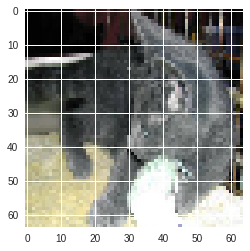

I am 100.00% sure this is a Dog


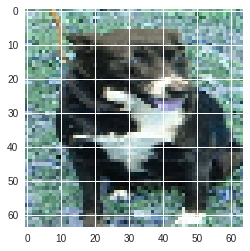

I am 100.00% sure this is a Dog


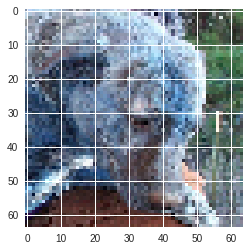

I am 100.00% sure this is a Dog


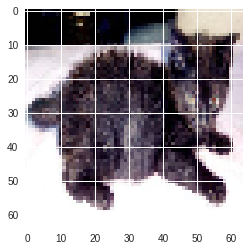

I am 100.00% sure this is a Dog


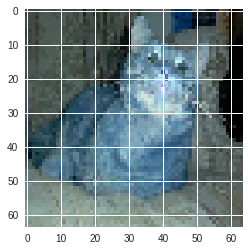

I am 100.00% sure this is a Dog


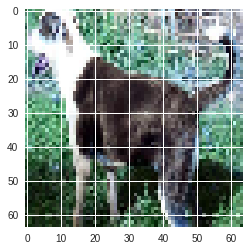

I am 100.00% sure this is a Dog


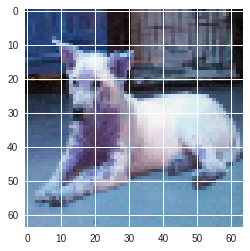

I am 100.00% sure this is a Dog


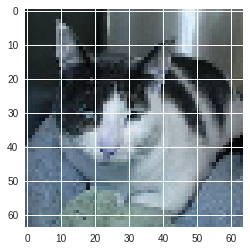

In [66]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i])
    plt.show()

참고 커널 URL
https://www.kaggle.com/jeffd23/catdognet-keras-convnet-starter



In [0]:
# TODO - 왜 위에 다 100%로 나오지? 아래부터 Transfer Learning 사용해서 해볼 것.

In [0]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 Model
ResNet50_model = ResNet50(weights='imagenet')

In [0]:
# Make sure you include https://www.kaggle.com/keras/vgg16/data as your data source
vgg_model_path = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'